In [1]:
# importing modules
import numpy as np
import pandas as pd
from sklearn import linear_model 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading train.csv
df=pd.read_csv('train.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Cleaning of data

In [5]:
# missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.isnull()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0        False        False      False  ...     False    True   True   
1        False        False      False  ...     False    True   True   
2        False        False      False  ...     False    True   True   
3        False        False      False  ...     False    True   True   
4        False        False      False  ...     False    True   True   
...        ...          ...        ...  ...       ...     ...    ...   
1455     False        False      False  ...     False    True   True   
1456     False        False      False  ...     False    True  False   
1457     False        False      False  ...     False    True  False   
1458     False        False      False  ...     False    True   True   
1459     False        False      False  ...     False    True   True   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0            True    False   False   False     False          False      False  
1            True    False   False   False     False          False      False  
2            True    False   False   False     False          False      False  
3            True    False   False   False     False          False      False  
4            True    False   False   False     False          False      False  
...           ...      ...     ...     ...       ...            ...        ...  
1455         True    False   False   False     False          False      False  
1456         True    False   False   False     False          False      False  
1457        False    False   False   False     False          False      False  
1458         True    False   False   False     False          False      False  
1459         True    False   False   False     False          False      False  

[1460 rows x 81 columns]

In [7]:
pd.set_option("display.max_columns",None)  # to get all the column
pd.set_option("display.max_rows",None)   # to print all the rows
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot:>

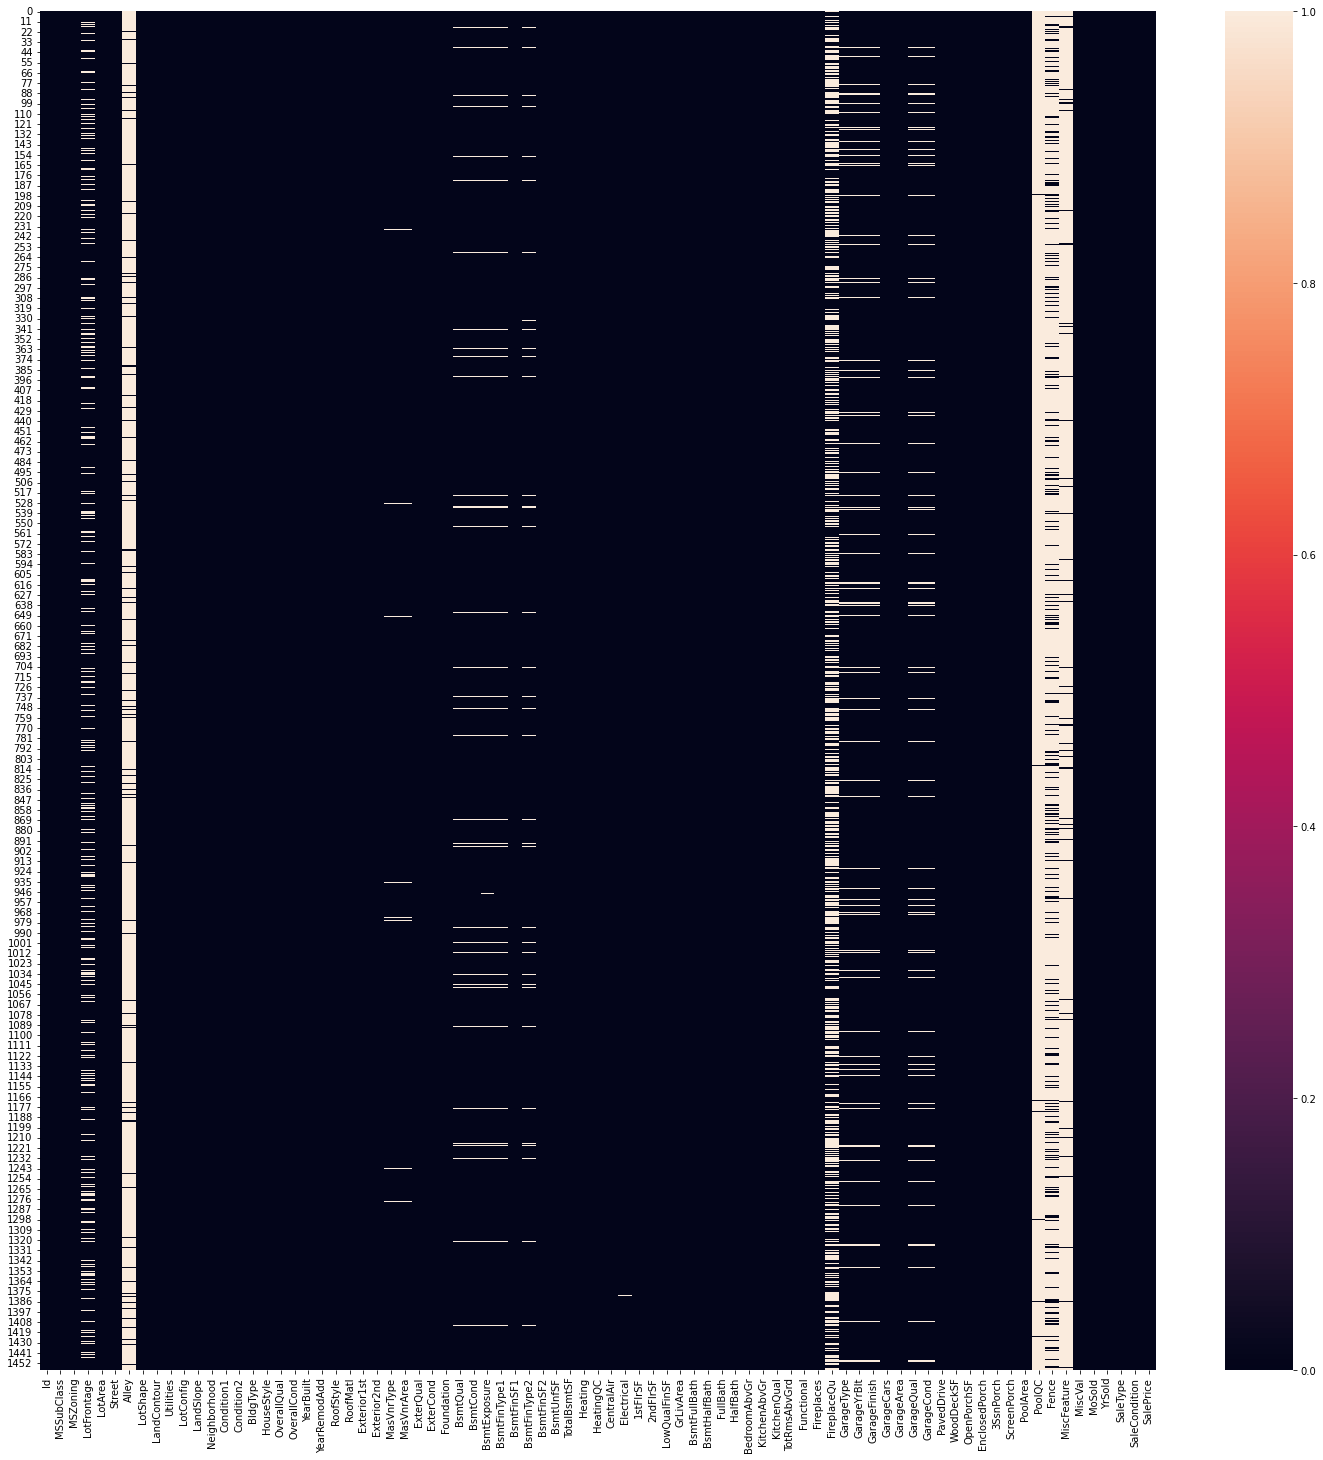

In [8]:
# checking null values on graph
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull()) # all white part is missing values

In [9]:
null_var=(df.isnull().sum()/df.shape[0])*100
null_var

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [10]:
# dropping the columns in which data more than 17% missing
drop_columns=null_var[null_var >17].keys()
drop_columns

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [11]:
df_drop=df.drop(columns = drop_columns)
df_drop=df_drop.drop('Id',axis=1)
df_drop.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd             7        Typ           1     Detchd       1998.0   
4          Gd          

In [12]:
df_drop.shape

(1460, 74)

<AxesSubplot:>

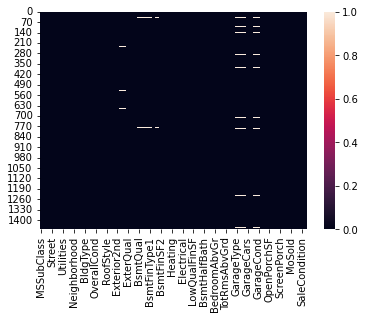

In [13]:
sns.heatmap(df_drop.isnull())

In [14]:
# remove the row in which even a single value missing
df_drop_row=df_drop.dropna()
df_drop_row.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd             7        Typ           1     Detchd       1998.0   
4          Gd          

In [15]:
df_drop_row.shape

(1338, 74)

In [16]:
sns.heatmap(df_drop_row.isnull())

<AxesSubplot:>

In [17]:
df_drop_row.isnull().sum().sum() # shows zero null values in dataframe

0

In [18]:
# dropping unwanted column
correlation = df_drop_row.corr()['SalePrice']
correlation

MSSubClass      -0.079599
LotArea          0.254757
OverallQual      0.783546
OverallCond     -0.108627
YearBuilt        0.504297
YearRemodAdd     0.501435
MasVnrArea       0.465811
BsmtFinSF1       0.359677
BsmtFinSF2      -0.031226
BsmtUnfSF        0.191689
TotalBsmtSF      0.602042
1stFlrSF         0.604714
2ndFlrSF         0.311354
LowQualFinSF    -0.009992
GrLivArea        0.711706
BsmtFullBath     0.209695
BsmtHalfBath    -0.030175
FullBath         0.569313
HalfBath         0.258175
BedroomAbvGr     0.169266
KitchenAbvGr    -0.111408
TotRmsAbvGrd     0.551821
Fireplaces       0.445434
GarageYrBlt      0.481730
GarageCars       0.640154
GarageArea       0.607535
WoodDeckSF       0.305983
OpenPorchSF      0.322786
EnclosedPorch   -0.127385
3SsnPorch        0.042159
ScreenPorch      0.096624
PoolArea         0.091881
MiscVal         -0.016990
MoSold           0.041310
YrSold          -0.020451
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [19]:
# dropping the column whose correlation with the Salleprice is nearly 0
drop_columns=correlation[(correlation <0.25) & (correlation>-0.25)].keys()
drop_columns

Index(['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [20]:
df_drop_row=df_drop_row.drop(columns=drop_columns)
df_drop_row

MSZoning  LotArea Street LotShape LandContour Utilities LotConfig  \
0          RL     8450   Pave      Reg         Lvl    AllPub    Inside   
1          RL     9600   Pave      Reg         Lvl    AllPub       FR2   
2          RL    11250   Pave      IR1         Lvl    AllPub    Inside   
3          RL     9550   Pave      IR1         Lvl    AllPub    Corner   
4          RL    14260   Pave      IR1         Lvl    AllPub       FR2   
5          RL    14115   Pave      IR1         Lvl    AllPub    Inside   
6          RL    10084   Pave      Reg         Lvl    AllPub    Inside   
7          RL    10382   Pave      IR1         Lvl    AllPub    Corner   
8          RM     6120   Pave      Reg         Lvl    AllPub    Inside   
9          RL     7420   Pave      Reg         Lvl    AllPub    Corner   
10         RL    11200   Pave      Reg         Lvl    AllPub    Inside   
11         RL    11924   Pave      IR1         Lvl    AllPub    Inside   
12         RL    12968   Pave      IR2         Lvl    AllPub    Inside   
13         RL    10652   Pave      IR1         Lvl    AllPub    Inside   
14         RL    10920   Pave      IR1         Lvl    AllPub    Corner   
15         RM     6120   Pave      Reg         Lvl    AllPub    Corner   
16         RL    11241   Pave      IR1         Lvl    AllPub   CulDSac   
18         RL    13695   Pave      Reg         Lvl    AllPub    Inside   
19         RL     7560   Pave      Reg         Lvl    AllPub    Inside   
20         RL    14215   Pave      IR1         Lvl    AllPub    Corner   
21         RM     7449   Pave      Reg         Bnk    AllPub    Inside   
22         RL     9742   Pave      Reg         Lvl    AllPub    Inside   
23         RM     4224   Pave      Reg         Lvl    AllPub    Inside   
24         RL     8246   Pave      IR1         Lvl    AllPub    Inside   
25         RL    14230   Pave      Reg         Lvl    AllPub    Corner   
26         RL     7200   Pave      Reg         Lvl    AllPub    Corner   
27         RL    11478   Pave      Reg         Lvl    AllPub    Inside   
28         RL    16321   Pave      IR1         Lvl    AllPub   CulDSac   
29         RM     6324   Pave      IR1         Lvl    AllPub    Inside   
30    C (all)     8500   Pave      Reg         Lvl    AllPub    Inside   
31         RL     8544   Pave      IR1         Lvl    AllPub   CulDSac   
32         RL    11049   Pave      Reg         Lvl    AllPub    Corner   
33         RL    10552   Pave      IR1         Lvl    AllPub    Inside   
34         RL     7313   Pave      Reg         Lvl    AllPub    Inside   
35         RL    13418   Pave      Reg         Lvl    AllPub    Inside   
36         RL    10859   Pave      Reg         Lvl    AllPub    Corner   
37         RL     8532   Pave      Reg         Lvl    AllPub    Inside   
38         RL     7922   Pave      Reg         Lvl    AllPub    Inside   
40         RL     8658   Pave      Reg         Lvl    AllPub    Inside   
41         RL    16905   Pave      Reg         Lvl    AllPub    Inside   
42         RL     9180   Pave      IR1         Lvl    AllPub   CulDSac   
43         RL     9200   Pave      IR1         Lvl    AllPub   CulDSac   
44         RL     7945   Pave      Reg         Lvl    AllPub    Inside   
45         RL     7658   Pave      Reg         Lvl    AllPub    Inside   
46         RL    12822   Pave      IR1         Lvl    AllPub   CulDSac   
47         FV    11096   Pave      Reg         Lvl    AllPub    Inside   
49         RL     7742   Pave      Reg         Lvl    AllPub    Inside   
50         RL    13869   Pave      IR2         Lvl    AllPub    Corner   
51         RM     6240   Pave      Reg         Lvl    AllPub    Inside   
52         RM     8472   Grvl      IR2         Bnk    AllPub    Corner   
53         RL    50271   Pave      IR1         Low    AllPub    Inside   
54         RL     7134   Pave      Reg         Bnk    AllPub    Inside   
55         RL    10175   Pave      IR1         Lvl    AllPub    Inside   
56       

In [21]:
df_drop_row.shape

(1338, 58)

In [22]:
# all the columns whose data types are integer or float
df_drop_row.select_dtypes(include=['number']).columns

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [23]:
# comparing data distribution before and after dropping rows and columns
comparable_col=['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']
comparable_col=df_drop_row[comparable_col].select_dtypes(include='number').columns

print(comparable_col)
plt.figure(figsize=(25,25))
for i,var in enumerate(comparable_col):
    plt.subplot(9,4,i+1)
    sns.distplot(df[var],bins=20)
    sns.distplot(df_drop_row[var],bins=20)

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')


In [24]:
# all the columns who are categorical 
df_drop_row.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
comaparable_col_char=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']

# set(comparable_col).intersection(set(comaparable_col_char))
pd.concat([df['MSZoning'].value_counts()/df.shape[0]*100,
          df_drop_row['MSZoning'].value_counts()/df_drop_row.shape[0]*100],axis=1,
          keys=['MSZoning_org','MSZoning_clean'])

MSZoning_org  MSZoning_clean
RL          78.835616       79.671151
RM          14.931507       14.275037
FV           4.452055        4.633782
RH           1.095890        0.822123
C (all)      0.684932        0.597907

In [26]:
def cat_distribution(var):
    return pd.concat([df[var].value_counts()/df.shape[0]*100,
          df_drop_row[var].value_counts()/df_drop_row.shape[0]*100],axis=1,
          keys=[var+'_org',var+'_clean'])

for var in comaparable_col_char:  
    print(cat_distribution(var),end='\n\n')

         MSZoning_org  MSZoning_clean
RL          78.835616       79.671151
RM          14.931507       14.275037
FV           4.452055        4.633782
RH           1.095890        0.822123
C (all)      0.684932        0.597907

      Street_org  Street_clean
Pave   99.589041     99.626308
Grvl    0.410959      0.373692

     LotShape_org  LotShape_clean
Reg     63.356164       61.958146
IR1     33.150685       34.304933
IR2      2.808219        2.989537
IR3      0.684932        0.747384

     LandContour_org  LandContour_clean
Lvl        89.794521          90.134529
Bnk         4.315068           3.886398
HLS         3.424658           3.587444
Low         2.465753           2.391629

        Utilities_org  Utilities_clean
AllPub      99.931507        99.925262
NoSeWa       0.068493         0.074738

         LotConfig_org  LotConfig_clean
Inside       72.054795        71.524664
Corner       18.013699        18.236173
CulDSac       6.438356         6.726457
FR2           3.219178     

In [27]:
df_drop_row.head()

MSZoning  LotArea Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL    14260   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0      CollgCr       Norm       Norm     1Fam     2Story            7   
1      Veenker      Feedr       Norm     1Fam     1Story            6   
2      CollgCr       Norm       Norm     1Fam     2Story            7   
3      Crawfor       Norm       Norm     1Fam     2Story            7   
4      NoRidge       Norm       Norm     1Fam     2Story            8   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  TotalBsmtSF Heating  \
0           No          GLQ         706          Unf          856    GasA   
1           Gd          ALQ         978          Unf         1262    GasA   
2           Mn          GLQ         486          Unf          920    GasA   
3           No          ALQ         216          Unf          756    GasA   
4           Av          GLQ         655          Unf         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  \
0        Ex          Y      SBrkr       856       854       1710         2   
1        Ex          Y      SBrkr      1262         0       1262         2   
2        Ex          Y      SBrkr       920       866       1786         2   
3        Gd          Y      SBrkr       961       756       1717         1   
4        Ex          Y      SBrkr      1145      1053       2198         2   

   HalfBath KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0         1          Gd             8        Typ           0     Attchd   
1         0          TA             6        Typ           1     Attchd   
2         1          Gd             6        Typ           1     Attchd   
3         0          Gd             7        Typ           1     Detchd   
4         1          Gd             9        Typ           1     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
0       2003.0          RFn           2         548         TA         TA   
1       1976.0          RFn           2         460         TA         TA   
2       2001.0          RFn           2         608         TA         TA   
3       1998.0          Unf           3         642         TA         TA   
4       2000.0          RFn           3         836         TA         TA   

  PavedDrive  WoodDeckSF  OpenPorchSF SaleType SaleCondition  SalePrice  
0          Y           0           61       WD        Normal     208500  
1          Y         298            0       WD        Normal     181500  
2          Y           0           42       WD        Normal     223500  
3          Y           0        

# Categorical variable encoding (converting categorical values into integer)

In [28]:
order_label={"Ex":6,"Gd":5,"TA":4,"Fa":3,"Po":1,"NA":1}

In [29]:
# all columns in which the order_label mention
col=['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond']

In [30]:
# df_drop_row
for var in col:
    df_drop_row[var]=df_drop_row[var].map(order_label)

In [31]:
 df_drop_row.head()

MSZoning  LotArea Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL    14260   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0      CollgCr       Norm       Norm     1Fam     2Story            7   
1      Veenker      Feedr       Norm     1Fam     1Story            6   
2      CollgCr       Norm       Norm     1Fam     2Story            7   
3      Crawfor       Norm       Norm     1Fam     2Story            7   
4      NoRidge       Norm       Norm     1Fam     2Story            8   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0    BrkFace       196.0          5          4      PConc         5         4   
1       None         0.0          4          4     CBlock         5         4   
2    BrkFace       162.0          5          4      PConc         5         4   
3       None         0.0          4          4     BrkTil         4         5   
4    BrkFace       350.0          5          4      PConc         5         4   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  TotalBsmtSF Heating  \
0           No          GLQ         706          Unf          856    GasA   
1           Gd          ALQ         978          Unf         1262    GasA   
2           Mn          GLQ         486          Unf          920    GasA   
3           No          ALQ         216          Unf          756    GasA   
4           Av          GLQ         655          Unf         1145    GasA   

   HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  \
0          6          Y      SBrkr       856       854       1710         2   
1          6          Y      SBrkr      1262         0       1262         2   
2          6          Y      SBrkr       920       866       1786         2   
3          5          Y      SBrkr       961       756       1717         1   
4          6          Y      SBrkr      1145      1053       2198         2   

   HalfBath  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0         1            5             8        Typ           0     Attchd   
1         0            4             6        Typ           1     Attchd   
2         1            5             6        Typ           1     Attchd   
3         0            5             7        Typ           1     Detchd   
4         1            5             9        Typ           1     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  \
0       2003.0          RFn           2         548           4           4   
1       1976.0          RFn           2         460           4           4   
2       2001.0          RFn           2         608           4           4   
3       1998.0          Unf           3         642           4           4   
4       2000.0          RFn           3         836           4           4   

  PavedDrive  WoodDeckSF  OpenPorchSF SaleType SaleCondition  SalePrice  
0          Y           0           61       WD        Normal     208500  
1          Y         298            0       WD        Normal     181500  
2          Y           0           42       WD        Norm

In [32]:
model_df_exe=pd.get_dummies(df_drop_row,drop_first=True)
model_df_exe.head()

LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
0     8450            7       2003          2003       196.0          5   
1     9600            6       1976          1976         0.0          4   
2    11250            7       2001          2002       162.0          5   
3     9550            7       1915          1970         0.0          4   
4    14260            8       2000          2000       350.0          5   

   ExterCond  BsmtQual  BsmtCond  BsmtFinSF1  TotalBsmtSF  HeatingQC  \
0          4         5         4         706          856          6   
1          4         5         4         978         1262          6   
2          4         5         4         486          920          6   
3          4         4         5         216          756          5   
4          4         5         4         655         1145          6   

   1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  KitchenQual  \
0       856       854       1710         2         1            5   
1      1262         0       1262         2         0            4   
2       920       866       1786         2         1            5   
3       961       756       1717         1         0            5   
4      1145      1053       2198         2         1            5   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  GarageQual  \
0             8           0       2003.0           2         548           4   
1             6           1       1976.0           2         460           4   
2             6           1       2001.0           2         608           4   
3             7           1       1998.0           3         642           4   
4             9           1       2000.0           3         836           4   

   GarageCond  WoodDeckSF  OpenPorchSF  SalePrice  MSZoning_FV  MSZoning_RH  \
0           4           0           61     208500            0            0   
1           4         298            0     181500            0            0   
2           4           0           42     223500            0            0   
3           4           0           35     140000            0            0   
4           4         192           84     250000            0            0   

   MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  \
0            1            0            1             0             0   
1            1            0            1             0             0   
2            1            0            1             0             0   
3            1            0            1             0             0   
4            1            0            1             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 0                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighbo

In [33]:
model_df_exe.shape

(1338, 192)

# Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
model_df_exe['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [36]:
model_df_exe.head()

LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
0     8450            7       2003          2003       196.0          5   
1     9600            6       1976          1976         0.0          4   
2    11250            7       2001          2002       162.0          5   
3     9550            7       1915          1970         0.0          4   
4    14260            8       2000          2000       350.0          5   

   ExterCond  BsmtQual  BsmtCond  BsmtFinSF1  TotalBsmtSF  HeatingQC  \
0          4         5         4         706          856          6   
1          4         5         4         978         1262          6   
2          4         5         4         486          920          6   
3          4         4         5         216          756          5   
4          4         5         4         655         1145          6   

   1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  KitchenQual  \
0       856       854       1710         2         1            5   
1      1262         0       1262         2         0            4   
2       920       866       1786         2         1            5   
3       961       756       1717         1         0            5   
4      1145      1053       2198         2         1            5   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  GarageQual  \
0             8           0       2003.0           2         548           4   
1             6           1       1976.0           2         460           4   
2             6           1       2001.0           2         608           4   
3             7           1       1998.0           3         642           4   
4             9           1       2000.0           3         836           4   

   GarageCond  WoodDeckSF  OpenPorchSF  SalePrice  MSZoning_FV  MSZoning_RH  \
0           4           0           61     208500            0            0   
1           4         298            0     181500            0            0   
2           4           0           42     223500            0            0   
3           4           0           35     140000            0            0   
4           4         192           84     250000            0            0   

   MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  \
0            1            0            1             0             0   
1            1            0            1             0             0   
2            1            0            1             0             0   
3            1            0            1             0             0   
4            1            0            1             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 0                  0              0              0   
4                 0                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighbo

# dropping uncommon column in train and test.csv and continue with scaling

In [37]:
# with the help of test.csv we find out the uncommon columns of train.csv 
model_df_exe=model_df_exe.drop(['Exterior2nd_CBlock', 'Condition2_RRAn', 'RoofMatl_Metal', 'Heating_OthW', 'Heating_Grav', 'Functional_Sev', 
                  'Condition2_RRNn', 'Exterior2nd_AsphShn', 'Condition2_RRAe', 'Exterior1st_CBlock', 'Exterior1st_Stone', 
                  'Utilities_NoSeWa', 'HouseStyle_2.5Fin', 'RoofMatl_CompShg', 'Exterior2nd_Stone', 
                  'RoofMatl_Membran', 'Exterior1st_ImStucc', 'Electrical_Mix', 'RoofMatl_Roll', 
                  'Exterior2nd_Other'],axis=1)
model_df_exe.head()

LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
0     8450            7       2003          2003       196.0          5   
1     9600            6       1976          1976         0.0          4   
2    11250            7       2001          2002       162.0          5   
3     9550            7       1915          1970         0.0          4   
4    14260            8       2000          2000       350.0          5   

   ExterCond  BsmtQual  BsmtCond  BsmtFinSF1  TotalBsmtSF  HeatingQC  \
0          4         5         4         706          856          6   
1          4         5         4         978         1262          6   
2          4         5         4         486          920          6   
3          4         4         5         216          756          5   
4          4         5         4         655         1145          6   

   1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  KitchenQual  \
0       856       854       1710         2         1            5   
1      1262         0       1262         2         0            4   
2       920       866       1786         2         1            5   
3       961       756       1717         1         0            5   
4      1145      1053       2198         2         1            5   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  GarageQual  \
0             8           0       2003.0           2         548           4   
1             6           1       1976.0           2         460           4   
2             6           1       2001.0           2         608           4   
3             7           1       1998.0           3         642           4   
4             9           1       2000.0           3         836           4   

   GarageCond  WoodDeckSF  OpenPorchSF  SalePrice  MSZoning_FV  MSZoning_RH  \
0           4           0           61     208500            0            0   
1           4         298            0     181500            0            0   
2           4           0           42     223500            0            0   
3           4           0           35     140000            0            0   
4           4         192           84     250000            0            0   

   MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  \
0            1            0            1             0             0   
1            1            0            1             0             0   
2            1            0            1             0             0   
3            1            0            1             0             0   
4            1            0            1             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                  

In [38]:
model_df_exe['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      180000
67      226000
68       80000
69      22

In [39]:
model_df_exe.shape

(1338, 172)

In [40]:
df_scaled = model_df_exe[[col for col in model_df_exe.columns if col != 'SalePrice'] + ['SalePrice']]
df_scaled.head()

LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
0     8450            7       2003          2003       196.0          5   
1     9600            6       1976          1976         0.0          4   
2    11250            7       2001          2002       162.0          5   
3     9550            7       1915          1970         0.0          4   
4    14260            8       2000          2000       350.0          5   

   ExterCond  BsmtQual  BsmtCond  BsmtFinSF1  TotalBsmtSF  HeatingQC  \
0          4         5         4         706          856          6   
1          4         5         4         978         1262          6   
2          4         5         4         486          920          6   
3          4         4         5         216          756          5   
4          4         5         4         655         1145          6   

   1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  KitchenQual  \
0       856       854       1710         2         1            5   
1      1262         0       1262         2         0            4   
2       920       866       1786         2         1            5   
3       961       756       1717         1         0            5   
4      1145      1053       2198         2         1            5   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  GarageQual  \
0             8           0       2003.0           2         548           4   
1             6           1       1976.0           2         460           4   
2             6           1       2001.0           2         608           4   
3             7           1       1998.0           3         642           4   
4             9           1       2000.0           3         836           4   

   GarageCond  WoodDeckSF  OpenPorchSF  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0           4           0           61            0            0            1   
1           4         298            0            0            0            1   
2           4           0           42            0            0            1   
3           4           0           35            0            0            1   
4           4         192           84            0            0            1   

   MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0            0            1             0             0             1   
1            0            1             0             0             1   
2            0            1             0             0             0   
3            0            1             0             0             0   
4            0            1             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0                0                0                1                  0   
1                0                0                1                  0   
2                0                0                1                  0   
3                0                0                1                  0   
4                0                0                1                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0              0              0                 1              0   
1              1              0                 0              0   
2              0              0                 1              0   
3              0              0                 0              0   
4              1              0                 0              0   

   LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                     0                    0   
1              0                     0                    0   
2              0                     0                    0   
3              0                     0                    0   
4              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhoo

In [41]:
df_scaled.shape

(1338, 172)

In [42]:
df_scaled_X=pd.DataFrame(StandardScaler().fit_transform(df_scaled.iloc[:,:-1]), columns=df_scaled.iloc[:,:-1].columns )
df_scaled_X.head()

LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
0 -0.218363     0.589337   1.014157      0.854216    0.461582   0.994420   
1 -0.107067    -0.165963   0.100528     -0.476562   -0.594820  -0.742569   
2  0.052620     0.589337   0.946480      0.804928    0.278328   0.994420   
3 -0.111906     0.589337  -1.963596     -0.772291   -0.594820  -0.742569   
4  0.343926     1.344638   0.912642      0.706352    1.291612   0.994420   

   ExterCond  BsmtQual  BsmtCond  BsmtFinSF1  TotalBsmtSF  HeatingQC  \
0  -0.279653  0.588004 -0.055073    0.527157    -0.591875   0.860923   
1  -0.279653  0.588004 -0.055073    1.120240     0.409598   0.860923   
2  -0.279653  0.588004 -0.055073    0.047458    -0.434007   0.860923   
3  -0.279653 -0.874355  3.453839   -0.541263    -0.838543  -0.195880   
4  -0.279653  0.588004 -0.055073    0.415954     0.120996   0.860923   

   1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  KitchenQual  \
0 -0.828516  1.128813   0.331321  0.775560  1.184848     0.685397   
1  0.221935 -0.811389  -0.529579  0.775560 -0.799291    -0.845590   
2 -0.662928  1.156076   0.477367  0.775560  1.184848     0.685397   
3 -0.556848  0.906167   0.344773 -1.051375 -0.799291     0.685397   
4 -0.080781  1.580921   1.269088  0.775560  1.184848     0.685397   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  GarageQual  \
0      0.915080   -1.005546     0.985427    0.202747    0.249341    0.101164   
1     -0.347165    0.544478    -0.104844    0.202747   -0.222023    0.101164   
2     -0.347165    0.544478     0.904666    0.202747    0.570726    0.101164   
3      0.283958    0.544478     0.783525    1.779928    0.752844    0.101164   
4      1.546203    0.544478     0.864286    1.779928    1.791989    0.101164   

   GarageCond  WoodDeckSF  OpenPorchSF  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0    0.106034   -0.779554     0.202294     -0.22043    -0.091046     0.505133   
1    0.106034    1.557895    -0.731311     -0.22043    -0.091046     0.505133   
2    0.106034   -0.779554    -0.088501     -0.22043    -0.091046     0.505133   
3    0.106034   -0.779554    -0.195636     -0.22043    -0.091046     0.505133   
4    0.106034    0.726453     0.554309     -0.22043    -0.091046     0.505133   

   MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0     -0.40807     0.061245     -0.175547     -0.086776      0.783577   
1     -0.40807     0.061245     -0.175547     -0.086776      0.783577   
2     -0.40807     0.061245     -0.175547     -0.086776     -1.276199   
3     -0.40807     0.061245     -0.175547     -0.086776     -1.276199   
4     -0.40807     0.061245     -0.175547     -0.086776     -1.276199   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0        -0.192897        -0.156532         0.330836          -0.268543   
1        -0.192897        -0.156532         0.330836          -0.268543   
2        -0.192897        -0.156532         0.330836          -0.268543   
3        -0.192897        -0.156532         0.330836          -0.268543   
4        -0.192897        -0.156532         0.330836          -0.268543   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0      -0.182221      -0.054759          0.630967      -0.218559   
1       5.487830      -0.054759         -1.584869      -0.218559   
2      -0.182221      -0.054759          0.630967      -0.218559   
3      -0.182221      -0.054759         -1.584869      -0.218559   
4       5.487830      -0.054759         -1.584869      -0.218559   

   LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0       -0.09513             -0.038691            -0.106479   
1       -0.09513             -0.038691            -0.106479   
2       -0.09513             -0.038691            -0.106479   
3       -0.09513             -0.038691            -0.106479   
4       -0.09513             -0.038691            -0.106479   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighb

In [43]:
df_scaled['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      180000
67      226000
68       80000
69      22

In [44]:
df_scaled_X.shape

(1338, 171)

# Applying linear regression

In [45]:
reg=linear_model.LinearRegression()
reg

LinearRegression()

In [46]:
reg.fit(df_scaled_X,df_scaled['SalePrice'])

LinearRegression()

In [47]:
a=list(df_scaled_X.columns)
a

['LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Ne

In [48]:
reg.coef_

array([ 5.57795506e+03,  1.29041458e+04,  2.65269732e+02,  1.80631674e+03,
        4.75456694e+03,  2.58912355e+03, -9.03688288e+02,  5.44064294e+03,
        2.68560918e+02,  4.94492682e+03, -2.69751869e+03,  1.25765501e+03,
        9.69227271e+03,  1.82195034e+04,  1.07995391e+04,  1.72160389e+03,
        1.27751296e+03,  5.65745152e+03,  2.75779293e+03,  1.98176974e+03,
       -2.98805540e+03,  6.65183575e+03,  5.93352481e+02,  2.21792815e+03,
       -4.75143344e+02,  1.44501210e+03, -1.07508380e+01,  7.58891753e+03,
        3.39588138e+03,  1.30098999e+04,  1.05619898e+04,  1.65053702e+03,
        1.07108828e+03, -3.37314289e+03,  6.06058537e+02,  3.40180772e+03,
        2.40569284e+02,  3.99056565e+03,  2.97446458e+03, -1.81943398e+03,
       -1.15080481e+03, -3.04020167e+02,  8.35470989e+02, -1.31075865e+03,
        2.01724174e+01,  1.52510534e+03,  7.51493296e+02, -1.25680524e+03,
       -2.51142965e+03,  3.09485943e+03, -3.91237419e+03, -2.39738854e+03,
       -2.51497212e+02, -

In [49]:
reg.intercept_

186761.7825112108

In [50]:
# Score of training dataset
score = reg.score(df_scaled_X,df_scaled['SalePrice'])
score

0.8882004939157159

In [51]:
# Predicting by giving scaled values
reg.predict([[-0.218363,0.589337,1.014157,0.854216,0.461582,0.994420,-0.279653,0.588004,-0.055073,0.527157,-0.591875,0.860923,
              -0.828516,1.128813,0.331321,0.775560,1.184848,0.685397,0.915080,-1.005546,0.985427,0.202747,0.249341,0.101164,
              0.106034,-0.779554,0.202294,-0.22043,-0.091046,0.505133,-0.40807,0.061245,-0.175547,-0.086776,0.783577,-0.192897,
              -0.156532,0.330836,-0.268543,-0.182221,-0.054759,0.630967,-0.218559,-0.09513,-0.038691,-0.106479,-0.190803,
              -0.140773,2.857339,-0.197028,-0.234958,-0.247109,-0.148843,-0.09513,-0.180021,-0.430255,-0.082292,-0.240224,
              -0.177796,-0.243685,-0.28421,-0.123185,-0.233181,-0.203089,-0.257168,-0.137987,-0.168641,-0.091046,-0.222288,
              0.389182,-0.077557,-0.12002,-0.086776,-0.140773,-0.038691,-0.061245,-0.061245,0.10283,-0.027349,-0.038691,
              -0.129295,-0.146199,-0.17097,-0.302248,-0.091046,-0.982221,-0.086776,1.463163,-0.151446,-0.224133,0.538758,
              -0.086776,-0.505133,-0.067116,-0.038691,-0.082292,-0.061245,-0.067116,-0.027349,-0.184399,-0.201086,-0.432692,
              -0.420453,-0.28421,-0.126275,1.324042,-0.398047,-0.123185,-0.067116,-0.129295,-0.199065,-0.415518,-0.086776,
              -0.415518,-0.323839,-0.132252,1.347903,-0.389182,-0.156532,1.448179,-1.151936,-0.325246,-0.874741,1.076134,
              -0.067116,-0.047405,-0.323839,-0.300773,0.713061,-0.343212,1.525896,-0.233181,-0.321014,-0.643721,-0.156532,
              -0.09513,-0.188689,-0.203089,0.371154,-0.110013,0.218559,-0.113442,-0.038691,0.278019,-0.054759,-0.146199,
              -0.151446,-0.091046,0.258816,0.755263,-0.12002,-0.260456,-0.07252,-0.617094,1.496566,-0.874741,-0.143509,
              0.253849,-0.054759,-0.038691,-0.067116,-0.054759,-0.054759,-0.309553,-0.027349,0.394259,-0.027349,-0.07252,
              -0.123185,0.460387,-0.313882]])

array([205933.31217357])

# Test Dataset

In [52]:
df_test=pd.read_csv('test.csv')
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [53]:
df.shape

(1460, 81)

# cleaning of test dataframe

In [54]:
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot:>

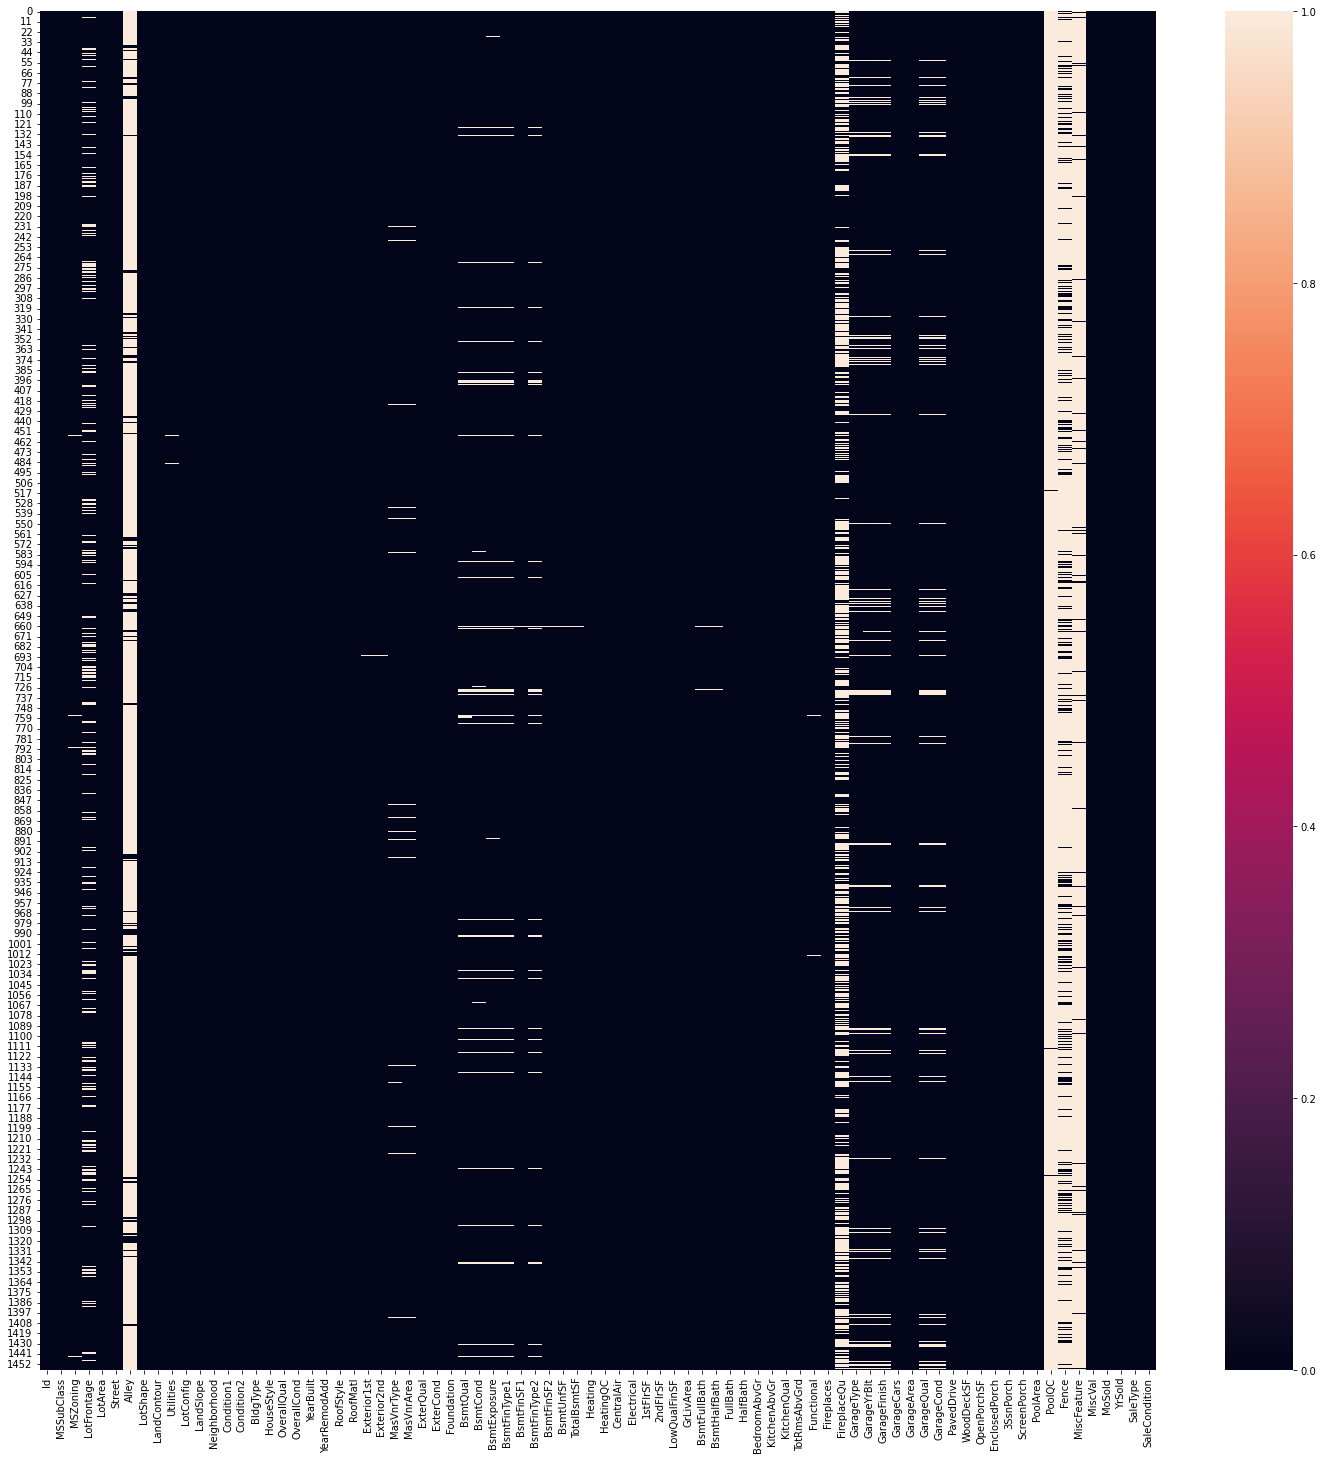

In [55]:
# printing heatmap
plt.figure(figsize=(25,25))
sns.heatmap(df_test.isnull())

In [56]:
# finding null values %
null_var_test=(df_test.isnull().sum()/df_test.shape[0])*100
null_var_test

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
Street            0.000000
Alley            92.666210
LotShape          0.000000
LandContour       0.000000
Utilities         0.137080
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068540
Exterior2nd       0.068540
MasVnrType        1.096642
MasVnrArea        1.028101
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          3.015764
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinSF1        0.068540
BsmtFinType2      2.878684
BsmtFinSF2        0.068540
B

In [57]:
# dropping columns with null values more than 15 %
drop_columns_test=null_var_test[null_var_test >15].keys()
drop_columns_test

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [58]:
df_drop_test=df_test.drop(columns = drop_columns_test)
df_drop_test=df_drop_test.drop('Id',axis=1)
df_drop_test.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          20       RH    11622   Pave      Reg         Lvl    AllPub   
1          20       RL    14267   Pave      IR1         Lvl    AllPub   
2          60       RL    13830   Pave      IR1         Lvl    AllPub   
3          60       RL     9978   Pave      IR1         Lvl    AllPub   
4         120       RL     5005   Pave      IR1         HLS    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story   
1    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story   
2    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story   
3    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story   
4    Inside       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            5            6       1961          1961     Gable  CompShg   
1            6            6       1958          1958       Hip  CompShg   
2            5            5       1997          1998     Gable  CompShg   
3            6            6       1998          1998     Gable  CompShg   
4            8            5       1992          1992     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd       None         0.0        TA        TA   
1     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA   
2     VinylSd     VinylSd       None         0.0        TA        TA   
3     VinylSd     VinylSd    BrkFace        20.0        TA        TA   
4     HdBoard     HdBoard       None         0.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       TA       TA           No          Rec       468.0   
1     CBlock       TA       TA           No          ALQ       923.0   
2      PConc       Gd       TA           No          GLQ       791.0   
3      PConc       TA       TA           No          GLQ       602.0   
4      PConc       Gd       TA           No          ALQ       263.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          LwQ       144.0      270.0        882.0    GasA        TA   
1          Unf         0.0      406.0       1329.0    GasA        TA   
2          Unf         0.0      137.0        928.0    GasA        Gd   
3          Unf         0.0      324.0        926.0    GasA        Ex   
4          Unf         0.0     1017.0       1280.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       896         0             0        896   
1          Y      SBrkr      1329         0             0       1329   
2          Y      SBrkr       928       701             0       1629   
3          Y      SBrkr       926       678             0       1604   
4          Y      SBrkr      1280         0             0       1280   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           0.0           0.0         1         0             2             1   
1           0.0           0.0         1         1             3             1   
2           0.0           0.0         2         1             3             1   
3           0.0           0.0         2         1             3             1   
4           0.0           0.0         2         0             2             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           0     Attchd       1961.0   
1          Gd             6        Typ           0     Attchd       1958.0   
2          TA             6        Typ           1     Attchd       1997.0   
3          Gd             7        Typ           1     Attchd       1998.0   
4          Gd          

In [59]:
df_drop_test.shape

(1459, 73)

<AxesSubplot:>

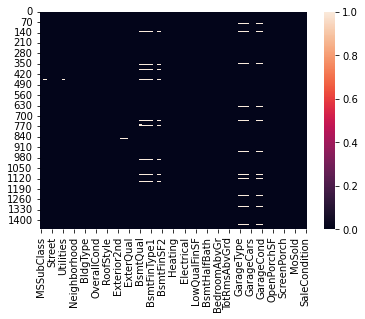

In [60]:
sns.heatmap(df_drop_test.isnull())

In [61]:
# remove the row in which even a single value missing
df_drop_row_test=df_drop_test.dropna()
df_drop_row_test.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          20       RH    11622   Pave      Reg         Lvl    AllPub   
1          20       RL    14267   Pave      IR1         Lvl    AllPub   
2          60       RL    13830   Pave      IR1         Lvl    AllPub   
3          60       RL     9978   Pave      IR1         Lvl    AllPub   
4         120       RL     5005   Pave      IR1         HLS    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl        NAmes      Feedr       Norm     1Fam     1Story   
1    Corner       Gtl        NAmes       Norm       Norm     1Fam     1Story   
2    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story   
3    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story   
4    Inside       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            5            6       1961          1961     Gable  CompShg   
1            6            6       1958          1958       Hip  CompShg   
2            5            5       1997          1998     Gable  CompShg   
3            6            6       1998          1998     Gable  CompShg   
4            8            5       1992          1992     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd       None         0.0        TA        TA   
1     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA   
2     VinylSd     VinylSd       None         0.0        TA        TA   
3     VinylSd     VinylSd    BrkFace        20.0        TA        TA   
4     HdBoard     HdBoard       None         0.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       TA       TA           No          Rec       468.0   
1     CBlock       TA       TA           No          ALQ       923.0   
2      PConc       Gd       TA           No          GLQ       791.0   
3      PConc       TA       TA           No          GLQ       602.0   
4      PConc       Gd       TA           No          ALQ       263.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          LwQ       144.0      270.0        882.0    GasA        TA   
1          Unf         0.0      406.0       1329.0    GasA        TA   
2          Unf         0.0      137.0        928.0    GasA        Gd   
3          Unf         0.0      324.0        926.0    GasA        Ex   
4          Unf         0.0     1017.0       1280.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       896         0             0        896   
1          Y      SBrkr      1329         0             0       1329   
2          Y      SBrkr       928       701             0       1629   
3          Y      SBrkr       926       678             0       1604   
4          Y      SBrkr      1280         0             0       1280   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           0.0           0.0         1         0             2             1   
1           0.0           0.0         1         1             3             1   
2           0.0           0.0         2         1             3             1   
3           0.0           0.0         2         1             3             1   
4           0.0           0.0         2         0             2             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           0     Attchd       1961.0   
1          Gd             6        Typ           0     Attchd       1958.0   
2          TA             6        Typ           1     Attchd       1997.0   
3          Gd             7        Typ           1     Attchd       1998.0   
4          Gd          

In [62]:
df_drop_row_test.shape

(1319, 73)

<AxesSubplot:>

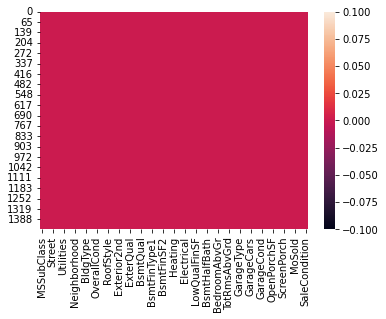

In [63]:
sns.heatmap(df_drop_row_test.isnull())

In [64]:
df_drop_row_test.isnull().sum().sum() # shows zero null values in dataframe

0

In [65]:
# dropping unwanted column
drop_columns

Index(['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [66]:
df_drop_row_test=df_drop_row_test.drop(columns=drop_columns)
df_drop_row_test

MSZoning  LotArea Street LotShape LandContour Utilities LotConfig  \
0          RH    11622   Pave      Reg         Lvl    AllPub    Inside   
1          RL    14267   Pave      IR1         Lvl    AllPub    Corner   
2          RL    13830   Pave      IR1         Lvl    AllPub    Inside   
3          RL     9978   Pave      IR1         Lvl    AllPub    Inside   
4          RL     5005   Pave      IR1         HLS    AllPub    Inside   
5          RL    10000   Pave      IR1         Lvl    AllPub    Corner   
6          RL     7980   Pave      IR1         Lvl    AllPub    Inside   
7          RL     8402   Pave      IR1         Lvl    AllPub    Inside   
8          RL    10176   Pave      Reg         Lvl    AllPub    Inside   
9          RL     8400   Pave      Reg         Lvl    AllPub    Corner   
10         RH     5858   Pave      IR1         Lvl    AllPub       FR2   
11         RM     1680   Pave      Reg         Lvl    AllPub    Inside   
12         RM     1680   Pave      Reg         Lvl    AllPub    Inside   
13         RL     2280   Pave      Reg         Lvl    AllPub       FR2   
14         RL     2280   Pave      Reg         Lvl    AllPub       FR2   
15         RL    12858   Pave      IR1         Lvl    AllPub    Inside   
16         RL    12883   Pave      IR1         Lvl    AllPub    Corner   
17         RL    11520   Pave      Reg         Lvl    AllPub    Inside   
18         RL    14122   Pave      IR1         Lvl    AllPub    Inside   
19         RL    14300   Pave      Reg         HLS    AllPub    Inside   
20         RL    13650   Pave      Reg         Lvl    AllPub    Corner   
21         RL     7132   Pave      IR1         Lvl    AllPub    Inside   
22         RL    18494   Pave      IR1         Lvl    AllPub    Corner   
23         RL     3203   Pave      Reg         Lvl    AllPub    Inside   
24         RL    13300   Pave      IR1         Lvl    AllPub    Inside   
25         RL     8577   Pave      IR1         Lvl    AllPub    Inside   
26         RL    17433   Pave      IR2         Lvl    AllPub   CulDSac   
28         FV     9215   Pave      Reg         Lvl    AllPub    Inside   
29         FV    10440   Pave      Reg         Lvl    AllPub    Corner   
30         RL    11920   Pave      Reg         Lvl    AllPub    Inside   
31         RH     9800   Pave      Reg         Lvl    AllPub    Corner   
32         RL    15410   Pave      IR1         Lvl    AllPub   CulDSac   
33         RL    13143   Pave      IR1         Lvl    AllPub    Inside   
34         RL    11134   Pave      Reg         Lvl    AllPub    Inside   
35         FV     4835   Pave      IR1         Lvl    AllPub   CulDSac   
36         FV     3515   Pave      Reg         Lvl    AllPub    Inside   
37         FV     3215   Pave      Reg         Lvl    AllPub    Inside   
38         FV     2544   Pave      Reg         Lvl    AllPub    Inside   
39         FV     2544   Pave      Reg         Lvl    AllPub    Inside   
40         FV     2980   Pave      Reg         Lvl    AllPub    Corner   
41         FV     2403   Pave      IR1         Lvl    AllPub       FR2   
42         FV    12853   Pave      IR1         Lvl    AllPub    Inside   
43         FV     7379   Pave      IR1         Lvl    AllPub    Inside   
44         FV     8000   Pave      Reg         Lvl    AllPub    Inside   
45         RL    10456   Pave      IR1         Lvl    AllPub    Inside   
46         RL    10791   Pave      Reg         Lvl    AllPub    Inside   
47         RL    18837   Pave      IR1         Lvl    AllPub    Inside   
48         RL     9600   Pave      Reg         Lvl    AllPub    Inside   
49         RL     9600   Pave      Reg         Lvl    AllPub    Inside   
50         RL     9900   Pave      Reg         Lvl    AllPub    Corner   
51         RL     9680   Pave      Reg         Lvl    AllPub    Inside   
52         RL    10600   Pave      IR1         Lvl    AllPub    Inside   
54         RL     9724   Pave      Reg         Lvl    AllPub    Inside   
55       

In [67]:
df_drop_row_test.shape

(1319, 57)

In [68]:
# all the columns whose data types are integer or float
df_drop_row_test.select_dtypes(include=['int64','float64']).columns

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF'],
      dtype='object')

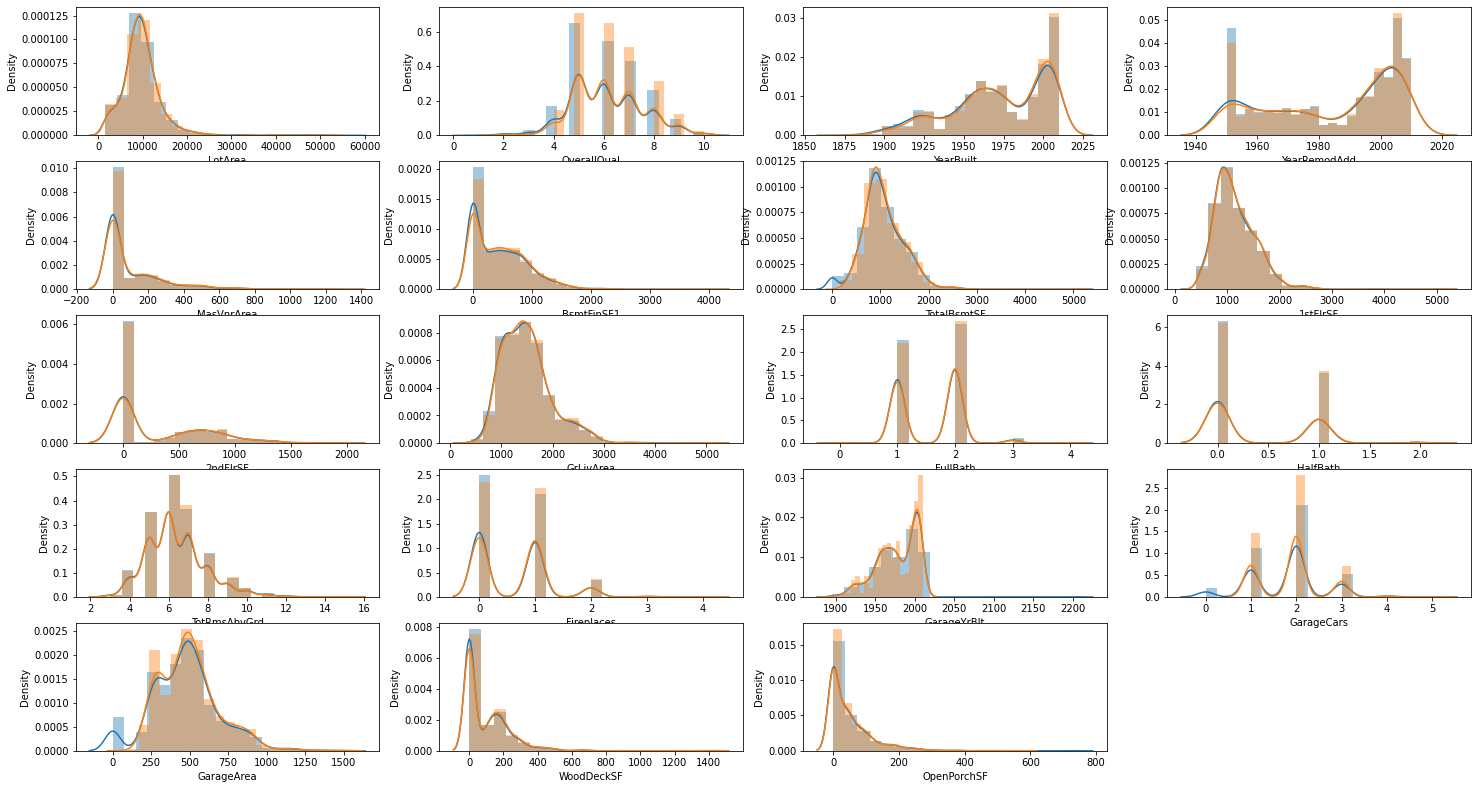

In [69]:
# comparing data distribution before and after dropping rows and columns
comparable_col_test=['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

plt.figure(figsize=(25,25))
for i,var in enumerate(comparable_col_test):
    plt.subplot(9,4,i+1)
    sns.distplot(df_test[var],bins=20)
    sns.distplot(df_drop_row_test[var],bins=20)

In [70]:
# all the columns who are categorical 
df_drop_row_test.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [71]:
comaparable_col_char_test=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']

# set(comparable_col).intersection(set(comaparable_col_char))
pd.concat([df_test['MSZoning'].value_counts()/df_test.shape[0]*100,
          df_drop_row_test['MSZoning'].value_counts()/df_drop_row_test.shape[0]*100],axis=1,
          keys=['MSZoning_org','MSZoning_clean'])

MSZoning_org  MSZoning_clean
RL          76.353667       78.165277
RM          16.586703       15.542077
FV           5.071967        5.231236
C (all)      1.028101        0.379075
RH           0.685401        0.682335

In [72]:
def cat_distribution_test(var):
    return pd.concat([df_test[var].value_counts()/df_test.shape[0]*100,
          df_drop_row_test[var].value_counts()/df_drop_row_test.shape[0]*100],axis=1,
          keys=[var+'_org',var+'_clean'])

for var in comaparable_col_char:  
    print(cat_distribution_test(var),end='\n\n')

         MSZoning_org  MSZoning_clean
RL          76.353667       78.165277
RM          16.586703       15.542077
FV           5.071967        5.231236
C (all)      1.028101        0.379075
RH           0.685401        0.682335

      Street_org  Street_clean
Pave   99.588759      99.69674
Grvl    0.411241       0.30326

     LotShape_org  LotShape_clean
Reg     64.016450       62.168309
IR1     33.173406       34.950720
IR2      2.398903        2.501895
IR3      0.411241        0.379075

     LandContour_org  LandContour_clean
Lvl        89.856066          89.764973
HLS         4.797807           5.079606
Bnk         3.701165           3.563306
Low         1.644962           1.592115

        Utilities_org  Utilities_clean
AllPub       99.86292            100.0

         LotConfig_org  LotConfig_clean
Inside       74.091844        74.071266
Corner       16.997944        16.906748
CulDSac       5.620288         5.837756
FR2           2.604524         2.501895
FR3           0.685401    

         SaleCondition_org  SaleCondition_clean
Normal           82.522276            83.623958
Partial           8.224812             8.263836
Abnorml           6.100069             5.307051
Family            1.782042             1.895375
Alloca            0.822481             0.530705
AdjLand           0.548321             0.379075



In [73]:
df_drop_row_test.head()

MSZoning  LotArea Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RH    11622   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL    14267   Pave      IR1         Lvl    AllPub    Corner       Gtl   
2       RL    13830   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL     9978   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4       RL     5005   Pave      IR1         HLS    AllPub    Inside       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0        NAmes      Feedr       Norm     1Fam     1Story            5   
1        NAmes       Norm       Norm     1Fam     1Story            6   
2      Gilbert       Norm       Norm     1Fam     2Story            5   
3      Gilbert       Norm       Norm     1Fam     2Story            6   
4      StoneBr       Norm       Norm   TwnhsE     1Story            8   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       1961          1961     Gable  CompShg     VinylSd     VinylSd   
1       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng   
2       1997          1998     Gable  CompShg     VinylSd     VinylSd   
3       1998          1998     Gable  CompShg     VinylSd     VinylSd   
4       1992          1992     Gable  CompShg     HdBoard     HdBoard   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       None         0.0        TA        TA     CBlock       TA       TA   
1    BrkFace       108.0        TA        TA     CBlock       TA       TA   
2       None         0.0        TA        TA      PConc       Gd       TA   
3    BrkFace        20.0        TA        TA      PConc       TA       TA   
4       None         0.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  TotalBsmtSF Heating  \
0           No          Rec       468.0          LwQ        882.0    GasA   
1           No          ALQ       923.0          Unf       1329.0    GasA   
2           No          GLQ       791.0          Unf        928.0    GasA   
3           No          GLQ       602.0          Unf        926.0    GasA   
4           No          ALQ       263.0          Unf       1280.0    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  \
0        TA          Y      SBrkr       896         0        896         1   
1        TA          Y      SBrkr      1329         0       1329         1   
2        Gd          Y      SBrkr       928       701       1629         2   
3        Ex          Y      SBrkr       926       678       1604         2   
4        Ex          Y      SBrkr      1280         0       1280         2   

   HalfBath KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0         0          TA             5        Typ           0     Attchd   
1         1          Gd             6        Typ           0     Attchd   
2         1          TA             6        Typ           1     Attchd   
3         1          Gd             7        Typ           1     Attchd   
4         0          Gd             5        Typ           0     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
0       1961.0          Unf         1.0       730.0         TA         TA   
1       1958.0          Unf         1.0       312.0         TA         TA   
2       1997.0          Fin         2.0       482.0         TA         TA   
3       1998.0          Fin         2.0       470.0         TA         TA   
4       1992.0          RFn         2.0       506.0         TA         TA   

  PavedDrive  WoodDeckSF  OpenPorchSF SaleType SaleCondition  
0          Y         140            0       WD        Normal  
1          Y         393           36       WD        Normal  
2          Y         212           34       WD        Normal  
3          Y         360           36       WD        Normal  
4          Y 

# Categorical variable encoding (converting categorical values into integer)

In [74]:
order_label_test={"Ex":6,"Gd":5,"TA":4,"Fa":3,"Po":1,"NA":1}

In [75]:
# all columns in which the order_label mention
col_test=['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond']

In [76]:
# df_drop_row
for var in col_test:
    df_drop_row_test[var]=df_drop_row_test[var].map(order_label_test)

In [77]:
 df_drop_row_test.head()

MSZoning  LotArea Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RH    11622   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL    14267   Pave      IR1         Lvl    AllPub    Corner       Gtl   
2       RL    13830   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL     9978   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4       RL     5005   Pave      IR1         HLS    AllPub    Inside       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0        NAmes      Feedr       Norm     1Fam     1Story            5   
1        NAmes       Norm       Norm     1Fam     1Story            6   
2      Gilbert       Norm       Norm     1Fam     2Story            5   
3      Gilbert       Norm       Norm     1Fam     2Story            6   
4      StoneBr       Norm       Norm   TwnhsE     1Story            8   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       1961          1961     Gable  CompShg     VinylSd     VinylSd   
1       1958          1958       Hip  CompShg     Wd Sdng     Wd Sdng   
2       1997          1998     Gable  CompShg     VinylSd     VinylSd   
3       1998          1998     Gable  CompShg     VinylSd     VinylSd   
4       1992          1992     Gable  CompShg     HdBoard     HdBoard   

  MasVnrType  MasVnrArea  ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  \
0       None         0.0          4          4     CBlock         4         4   
1    BrkFace       108.0          4          4     CBlock         4         4   
2       None         0.0          4          4      PConc         5         4   
3    BrkFace        20.0          4          4      PConc         4         4   
4       None         0.0          5          4      PConc         5         4   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  TotalBsmtSF Heating  \
0           No          Rec       468.0          LwQ        882.0    GasA   
1           No          ALQ       923.0          Unf       1329.0    GasA   
2           No          GLQ       791.0          Unf        928.0    GasA   
3           No          GLQ       602.0          Unf        926.0    GasA   
4           No          ALQ       263.0          Unf       1280.0    GasA   

   HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  \
0          4          Y      SBrkr       896         0        896         1   
1          4          Y      SBrkr      1329         0       1329         1   
2          5          Y      SBrkr       928       701       1629         2   
3          6          Y      SBrkr       926       678       1604         2   
4          6          Y      SBrkr      1280         0       1280         2   

   HalfBath  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0         0            4             5        Typ           0     Attchd   
1         1            5             6        Typ           0     Attchd   
2         1            4             6        Typ           1     Attchd   
3         1            5             7        Typ           1     Attchd   
4         0            5             5        Typ           0     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  \
0       1961.0          Unf         1.0       730.0           4           4   
1       1958.0          Unf         1.0       312.0           4           4   
2       1997.0          Fin         2.0       482.0           4           4   
3       1998.0          Fin         2.0       470.0           4           4   
4       1992.0          RFn         2.0       506.0           4           4   

  PavedDrive  WoodDeckSF  OpenPorchSF SaleType SaleCondition  
0          Y         140            0       WD        Normal  
1          Y         393           36       WD        Normal  
2          Y         212           34       WD        Normal  
3          Y         360    

In [78]:
model_df_exe_test=pd.get_dummies(df_drop_row_test,drop_first=True)
model_df_exe_test.head()

LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
0    11622            5       1961          1961         0.0          4   
1    14267            6       1958          1958       108.0          4   
2    13830            5       1997          1998         0.0          4   
3     9978            6       1998          1998        20.0          4   
4     5005            8       1992          1992         0.0          5   

   ExterCond  BsmtQual  BsmtCond  BsmtFinSF1  TotalBsmtSF  HeatingQC  \
0          4         4         4       468.0        882.0          4   
1          4         4         4       923.0       1329.0          4   
2          4         5         4       791.0        928.0          5   
3          4         4         4       602.0        926.0          6   
4          4         5         4       263.0       1280.0          6   

   1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  KitchenQual  \
0       896         0        896         1         0            4   
1      1329         0       1329         1         1            5   
2       928       701       1629         2         1            4   
3       926       678       1604         2         1            5   
4      1280         0       1280         2         0            5   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  GarageQual  \
0             5           0       1961.0         1.0       730.0           4   
1             6           0       1958.0         1.0       312.0           4   
2             6           1       1997.0         2.0       482.0           4   
3             7           1       1998.0         2.0       470.0           4   
4             5           0       1992.0         2.0       506.0           4   

   GarageCond  WoodDeckSF  OpenPorchSF  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0           4         140            0            0            1            0   
1           4         393           36            0            0            1   
2           4         212           34            0            0            1   
3           4         360           36            0            0            1   
4           4           0           82            0            0            1   

   MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0            0            1             0             0             1   
1            0            1             0             0             0   
2            0            1             0             0             0   
3            0            1             0             0             0   
4            0            1             0             0             0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0                0                0                1                  0   
1                0                0                1                  0   
2                0                0                1                  0   
3                0                0                1                  0   
4                1                0                0                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0              0              0                 1              0   
1              0              0                 0              0   
2              0              0                 1              0   
3              0              0                 1              0   
4              0              0                 1              0   

   LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                     0                    0   
1              0                     0                    0   
2              0                     0                    0   
3              0                     0                    0   
4              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhoo

In [79]:
model_df_exe_test.shape

(1319, 171)

# Feature Scaling

In [80]:
model_df_exe.head()

LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
0     8450            7       2003          2003       196.0          5   
1     9600            6       1976          1976         0.0          4   
2    11250            7       2001          2002       162.0          5   
3     9550            7       1915          1970         0.0          4   
4    14260            8       2000          2000       350.0          5   

   ExterCond  BsmtQual  BsmtCond  BsmtFinSF1  TotalBsmtSF  HeatingQC  \
0          4         5         4         706          856          6   
1          4         5         4         978         1262          6   
2          4         5         4         486          920          6   
3          4         4         5         216          756          5   
4          4         5         4         655         1145          6   

   1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  KitchenQual  \
0       856       854       1710         2         1            5   
1      1262         0       1262         2         0            4   
2       920       866       1786         2         1            5   
3       961       756       1717         1         0            5   
4      1145      1053       2198         2         1            5   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  GarageQual  \
0             8           0       2003.0           2         548           4   
1             6           1       1976.0           2         460           4   
2             6           1       2001.0           2         608           4   
3             7           1       1998.0           3         642           4   
4             9           1       2000.0           3         836           4   

   GarageCond  WoodDeckSF  OpenPorchSF  SalePrice  MSZoning_FV  MSZoning_RH  \
0           4           0           61     208500            0            0   
1           4         298            0     181500            0            0   
2           4           0           42     223500            0            0   
3           4           0           35     140000            0            0   
4           4         192           84     250000            0            0   

   MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  \
0            1            0            1             0             0   
1            1            0            1             0             0   
2            1            0            1             0             0   
3            1            0            1             0             0   
4            1            0            1             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
0                  0              0              0                 1   
1                  0              1              0                 0   
2                  0              0              0                 1   
3                  0              0              0                 0   
4                  0              1              0                 0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0              0                     0                    0   
1              0              0                     0                    0   
2              0              0                     0                    0   
3              0              0                     0                    0   
4              0              0                     0                  

In [81]:
df_scaled_test=pd.DataFrame(StandardScaler().fit_transform(model_df_exe_test.iloc[:,:]), columns=model_df_exe_test.iloc[:,:].columns)
df_scaled_test.head()

LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
0  0.405344    -0.875367  -0.415341     -1.136502   -0.591482  -0.735380   
1  0.982120    -0.149198  -0.517295     -1.281585   -0.001276  -0.735380   
2  0.886827    -0.875367   0.808111      0.652855   -0.591482  -0.735380   
3  0.046848    -0.149198   0.842096      0.652855   -0.482185  -0.735380   
4 -1.037579     1.303140   0.638187      0.362689   -0.591482   0.978341   

   ExterCond  BsmtQual  BsmtCond  BsmtFinSF1  TotalBsmtSF  HeatingQC  \
0  -0.250564 -0.834185 -0.010599    0.001560    -0.498019  -1.283247   
1  -0.250564 -0.834185 -0.010599    0.998800     0.588082  -1.283247   
2  -0.250564  0.574637 -0.010599    0.709491    -0.386250  -0.216705   
3  -0.250564 -0.834185 -0.010599    0.295253    -0.391110   0.849838   
4  -0.250564  0.574637 -0.010599   -0.447745     0.469024   0.849838   

   1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  KitchenQual  \
0 -0.682578 -0.782296  -1.248656 -1.052515 -0.768698    -0.816332   
1  0.411052 -0.782296  -0.354171 -1.052515  1.215476     0.702345   
2 -0.601756  0.874777   0.265566  0.764589  1.215476    -0.816332   
3 -0.606807  0.820408   0.213921  0.764589  1.215476     0.702345   
4  0.287293 -0.782296  -0.455394  0.764589 -0.768698     0.702345   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  GarageQual  \
0     -0.938310   -0.945030    -0.671718   -1.291952    1.194949    0.183065   
1     -0.260899   -0.945030    -0.789956   -1.291952   -0.983599    0.183065   
2     -0.260899    0.591955     0.747137    0.193736   -0.097587    0.183065   
3      0.416513    0.591955     0.786550    0.193736   -0.160129    0.183065   
4     -0.938310   -0.945030     0.550074    0.193736    0.027497    0.183065   

   GarageCond  WoodDeckSF  OpenPorchSF  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0    0.120136    0.312444    -0.737896    -0.234947    12.064641    -1.892052   
1    0.120136    2.252401    -0.197107    -0.234947    -0.082887     0.528527   
2    0.120136    0.864527    -0.227151    -0.234947    -0.082887     0.528527   
3    0.120136    1.999363    -0.197107    -0.234947    -0.082887     0.528527   
4    0.120136   -0.761049     0.493901    -0.234947    -0.082887     0.528527   

   MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0    -0.428977     0.055153      -0.16019     -0.061686      0.780088   
1    -0.428977     0.055153      -0.16019     -0.061686     -1.281907   
2    -0.428977     0.055153      -0.16019     -0.061686     -1.281907   
3    -0.428977     0.055153      -0.16019     -0.061686     -1.281907   
4    -0.428977     0.055153      -0.16019     -0.061686     -1.281907   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  \
0        -0.231332        -0.127196         0.337669          -0.248992   
1        -0.231332        -0.127196         0.337669          -0.248992   
2        -0.231332        -0.127196         0.337669          -0.248992   
3        -0.231332        -0.127196         0.337669          -0.248992   
4         4.322796        -0.127196        -2.961481          -0.248992   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0       -0.16019      -0.082887          0.591651      -0.214465   
1       -0.16019      -0.082887         -1.690185      -0.214465   
2       -0.16019      -0.082887          0.591651      -0.214465   
3       -0.16019      -0.082887          0.591651      -0.214465   
4       -0.16019      -0.082887          0.591651      -0.214465   

   LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0      -0.047746             -0.078117            -0.103576   
1      -0.047746             -0.078117            -0.103576   
2      -0.047746             -0.078117            -0.103576   
3      -0.047746             -0.078117            -0.103576   
4      -0.047746             -0.078117            -0.103576   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighb

In [82]:
df_scaled_test.shape

(1319, 171)

In [83]:
# stroing predicted value in result_array and priting it
result_array=reg.predict(df_scaled_test)
result_array

array([110889.55980234, 174168.17249769, 180254.46175074, ...,
        75140.04494887, 182583.9069965 , 231510.86075894])

In [84]:
b=list(df_scaled_test.columns)
b

['LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Ne

In [85]:
# checking the uncommon values between train.csv and test.csv
uncommon_values = set(a) ^ set(b)
print("Uncommon values:", uncommon_values)

Uncommon values: set()


# All the predicted values of Saleprice on test.csv

In [86]:
# converting the predicted value data type to dataframe so it more readable
Result=pd.DataFrame(result_array,columns=['SalePrice'])
Result

SalePrice
0     110889.559802
1     174168.172498
2     180254.461751
3     181950.708304
4     205060.822627
5     169472.560239
6     166208.195559
7     156851.037999
8     216002.181774
9     119682.444086
10    173192.260721
11    102388.156081
12     97404.334391
13    135251.253840
14    101154.902288
15    345299.920125
16    280431.720681
17    326526.441731
18    325227.864678
19    444849.650469
20    328508.176142
21    220946.583604
22    184245.009664
23    163271.009949
24    211132.288472
25    198481.823148
26    337630.653903
27    209489.685556
28    233862.340647
29    206920.902287
30    105186.219047
31    222505.543819
32    353241.709067
33    300081.767361
34    232319.869024
35    160652.851107
36    171079.105008
37    170928.605041
38    144716.321935
39    195225.603457
40    129422.064400
41    281180.873329
42    238862.994783
43    224348.801966
44    182858.879329
45    253229.491788
46    200354.418246
47    160704.408435
48    149161.583339
49    163589.360497
50    169217.081082
51    159422.539760
52    202142.887037
53    170467.674597
54    169431.206796
55    106096.679218
56    216150.502579
57    134667.912917
58    137902.596200
59    190842.459163
60    110128.497076
61    103566.241145
62    124372.076251
63    114478.370969
64    105788.159931
65    113875.367564
66    160759.825265
67    191001.359478
68    160857.225836
69    155235.794270
70    117265.511078
71    149756.867049
72     95912.363707
73     47011.667295
74    167907.782197
75    211217.209261
76    132853.580167
77    147040.525107
78    186716.961157
79     70739.392069
80    131093.160398
81    156324.091909
82    145702.578239
83    155298.336263
84    137597.505896
85    158181.414688
86    111481.679082
87    185660.494799
88    115104.075108
89    154702.971476
90     86273.119429
91    139364.630487
92    135788.020235
93    136572.597269
94    143862.298109
95    169372.653464
96    233361.155779
97     61795.412542
98    241010.774886
99    127497.892770
100   146606.011924
101    74869.882137
102   130569.631316
103   262799.640288
104   149588.258809
105   241419.391775
106   236639.947945
107   182974.550941
108   154171.036180
109   149150.511988
110   187480.627549
111   157719.796608
112   136901.323445
113   291236.937641
114   227243.820220
115   136979.471812
116   115639.566361
117   168097.960558
118    80662.023135
119   121170.893203
120   101577.210525
121   137001.005269
122   237547.133743
123   215771.140170
124   230399.560471
125   193709.846615
126   179361.021879
127    53172.721833
128   126290.141467
129    74822.865589
130   273329.324748
131   246759.699113
132   159114.336624
133   161723.961587
134   213296.096198
135   190814.611553
136   152121.386020
137   149011.878894
138   180381.252914
139   164048.929370
140   128026.919116
141    69619.733032
142   132018.813885
143   162404.239416
144   186069.891272
145   142325.999829
146   160321.139501
147   280102.782826
148   213802.993306
149   124173.852594
150   175055.293958
151   183451.923399
152   300362.257809
153   194020.295566
154   348114.029196
155   273936.048275
156   259828.093953
157   196627.769118
158   183412.394753
159   182387.557318
160   152811.200365
161   175975.210224
162   205829.525268
163   167388.960728
164   249124.015557
165   182446.963775
166   256154.342566
167   234486.650093
168   252229.251279
169   191101.578989
170   158746.813298
171   160546.821528
172   119801.985406
173   131620.650450
174   114534.429028
175   108641.714154
176   102531.109643
177    96586.154076
178   141067.136311
179   127913.211035
180   142045.000018
181   155822.754969
182   149731.054771
183   116591.303458
184   150497.762151
185   410041.800934
186   377534.332951
187   362982.710435
188   483460.127853
189   309001.336956
190   338721.601808
191   321715.927098
192   339188.330752
193   322256.849018
194   347846.413217
195   290912.380657
196   389726.801654
197   320807.432837
198   268244.838008
199   2157